###NEW


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense, Activation, Flatten

In [ ]:
from keras.datasets import fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [ ]:
def idBlock(x, filter):
    # copy the input to feed it forward
    res = x
    # First Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Second Layer 
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Feed the res
    x = tf.keras.layers.Add()([x, res])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def convBlock(x, filter):
    # copy the input to feed it forward
    res = x
    # sending the res through conv(1,1) before feeding it
    res = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(res)
    # First Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Second Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Feed the processed res
    x = tf.keras.layers.Add()([x, res])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def ResNet18(shape = (28, 28, 1), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [2, 2, 2, 2]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = idBlock(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convBlock(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = idBlock(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet18")
    return model

In [ ]:
hist=[]
results=[]

In [ ]:
model = ResNet18()

In [ ]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01, momentum=0.9),Adam(lr=0.001)]
epochs_list = [5,10,20]
for optimizer in  opt_list:
  for epoch in epochs_list:

    model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = model.fit(train_X,train_y,batch_size=64,epochs=epoch,validation_split = 0.2)
    hist.append(history.history)
    results.append(model.evaluate(test_X, test_y, batch_size=128))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
750/750 [==============================] - 34s 29ms/step - loss: 0.4519 - accuracy: 0.8363 - val_loss: 0.3966 - val_accuracy: 0.8578
Epoch 2/5
750/750 [==============================] - 21s 28ms/step - loss: 0.3061 - accuracy: 0.8870 - val_loss: 0.3380 - val_accuracy: 0.8765
Epoch 3/5
750/750 [==============================] - 21s 29ms/step - loss: 0.2596 - accuracy: 0.9035 - val_loss: 0.2855 - val_accuracy: 0.8943
Epoch 4/5
750/750 [==============================] - 22s 29ms/step - loss: 0.2285 - accuracy: 0.9147 - val_loss: 0.2837 - val_accuracy: 0.8994
Epoch 5/5
79/79 [==============================] - 1s 14ms/step - loss: 0.3143 - accuracy: 0.8920
Epoch 1/10
750/750 [==============================] - 23s 29ms/step - loss: 0.1871 - accuracy: 0.9299 - val_loss: 0.2837 - val_accuracy: 0.9007
Epoch 2/10
750/750 [==============================] - 21s 28ms/step - loss: 0.1689 - accuracy: 0.9358 - val_loss: 0.2607 - val_accuracy: 0.9126
Epoch 3/10
750/750 [======================

In [ ]:
hist

[{'loss': [0.45185840129852295,
   0.3060832619667053,
   0.2595905065536499,
   0.2284751981496811,
   0.20646388828754425],
  'accuracy': [0.8363333344459534,
   0.8870208263397217,
   0.9034583568572998,
   0.9147083163261414,
   0.9229166507720947],
  'val_loss': [0.39660465717315674,
   0.3380025029182434,
   0.2854851484298706,
   0.28367742896080017,
   0.2870795428752899],
  'val_accuracy': [0.8578333258628845,
   0.8765000104904175,
   0.8943333625793457,
   0.8994166851043701,
   0.8991666436195374]},
 {'loss': [0.18707630038261414,
   0.16887059807777405,
   0.15254928171634674,
   0.136738121509552,
   0.12469185143709183,
   0.1151074692606926,
   0.10388056188821793,
   0.0893796980381012,
   0.08600418269634247,
   0.08014798909425735],
  'accuracy': [0.92989581823349,
   0.9358333349227905,
   0.9417083263397217,
   0.9480000138282776,
   0.9525416493415833,
   0.9558541774749756,
   0.9598958492279053,
   0.9658125042915344,
   0.9672708511352539,
   0.9694166779518127

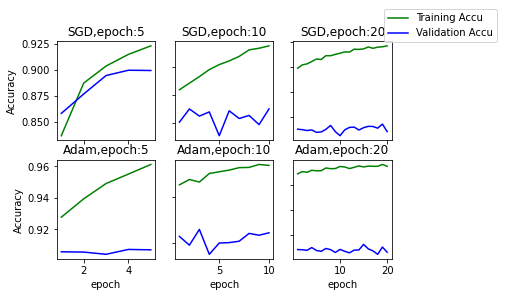

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

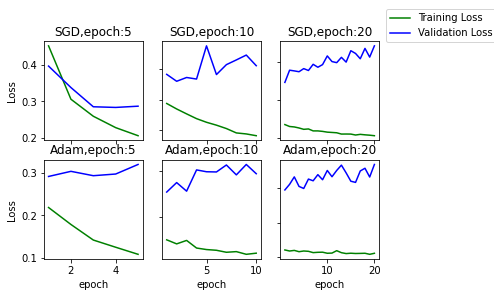

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
def ResNet34(shape = (28, 28, 1), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = idBlock(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convBlock(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = idBlock(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
hist=[]
results=[]

In [ ]:
model = ResNet34()

In [ ]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01, momentum=0.9),Adam(lr=0.001)]
epochs_list = [5,10,20]
for optimizer in  opt_list:
  for epoch in epochs_list:

    model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = model.fit(train_X,train_y,batch_size=64,epochs=epoch,validation_split = 0.2)
    hist.append(history.history)
    results.append(model.evaluate(test_X, test_y, batch_size=128))

Epoch 1/5
750/750 [==============================] - 40s 49ms/step - loss: 0.4793 - accuracy: 0.8264 - val_loss: 0.3626 - val_accuracy: 0.8668
Epoch 2/5
750/750 [==============================] - 36s 48ms/step - loss: 0.3112 - accuracy: 0.8859 - val_loss: 0.2905 - val_accuracy: 0.8942
Epoch 3/5
750/750 [==============================] - 36s 48ms/step - loss: 0.2659 - accuracy: 0.9009 - val_loss: 0.2972 - val_accuracy: 0.8905
Epoch 4/5
750/750 [==============================] - 36s 48ms/step - loss: 0.2365 - accuracy: 0.9131 - val_loss: 0.2887 - val_accuracy: 0.8943
Epoch 5/5
79/79 [==============================] - 2s 21ms/step - loss: 0.2774 - accuracy: 0.9015
Epoch 1/10
750/750 [==============================] - 39s 49ms/step - loss: 0.1949 - accuracy: 0.9274 - val_loss: 0.2466 - val_accuracy: 0.9118
Epoch 2/10
750/750 [==============================] - 36s 48ms/step - loss: 0.1774 - accuracy: 0.9337 - val_loss: 0.2803 - val_accuracy: 0.9023
Epoch 3/10
750/750 [======================

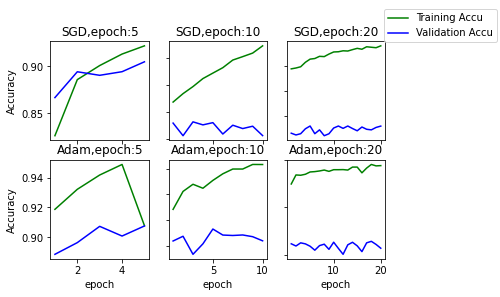

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

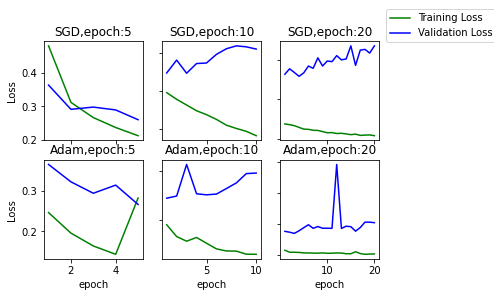

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()